<a href="https://colab.research.google.com/github/DeeDoDo/Dee_python_projects/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# Load dataset
from google.colab import files
uploaded = files.upload()

Saving Iris_2.csv to Iris_2 (1).csv


In [ ]:
#save dataset
import pandas as pd
import io
iris_data = pd.read_csv(io.StringIO(uploaded['Iris_2.csv'].decode('utf-8')))

In [ ]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# creating test and training sets
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']#feature selection
x = iris_data[feature_cols] # Features
y = iris_data.loc[:,'Species'] # Target variable
# Split dataset into training set and test set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
# Running the model
# Init the Gaussian Classifier
model = GaussianNB()
# Train the model
model.fit(xtrain, ytrain)
# Predict Output
pred = model.predict(xtest)

In [ ]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))


[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



Text(89.18, 0.5, 'Predicted')

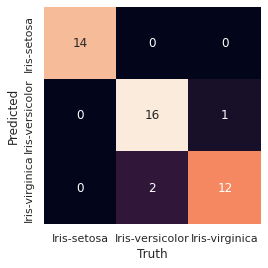

In [ ]:
#creating a heatmap
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')